# Analyzing Projectiles

This notebook will consider the motion of simple projectiles traveling in two dimensions through dragless, linear, and quadratic drag media. It will consist of interactive widgets for users to explore this sort of system in different situations, accompanied as well by animated simulations. As such, the user should be able to compare the motions of the projectiles through different media. In the end, I hope for it to be come a useful teaching and learning tool, both from the physics and the programming standpoint.

## Projectiles with no drag

In the idealized case of no drag forces, the equations of motion for the trajectory of the projectile can be easily derived from Newton's second law. Letting $\mathbf{r} = \begin{pmatrix} x \\ y \end{pmatrix}$, and expressing the force on the projectile as $\mathbf{F} = m \ddot{\mathbf{r}} = m\dot{\mathbf{v}}$, we have

\begin{align*}
\sum \mathbf{F} = m \dot{\mathbf{v}} = 
\begin{pmatrix}
0 \\
-mg
\end{pmatrix}
\implies 
\mathbf{r}(t) = 
\begin{pmatrix}
x(t) \\
y(t)
\end{pmatrix}
=
\begin{pmatrix}
x_0 + v_{0,x}t  \\
y_0 + v_{0,y}t - \frac{1}{2}gt^2
\end{pmatrix}
\end{align*}

where $x_0, y_0$ are the initial $x$ and $y$ positions, $v_{0,x}, v_{0, y}$ are the initial velocities, and $g$ is the acceleration due to gravity. In the above, if we consider a projectile being launched at an angle $\theta$ from the horizontal with initial velocity $\mathbf{v}_0$, $\mathbf{r}(t)$ becomes 

\begin{align}
\mathbf{r}(t) =
\begin{pmatrix}
x_0 + v_0 t\cos\theta  \\
y_0 + v_0 t\sin\theta - \frac{1}{2}gt^2
\end{pmatrix}
\end{align}

Here we have separated the velocities into components as their projections onto the $x$ and $y$ axes. In the following cells, I will plot what this looks like.

In [1]:
#import the libraries we'll be using

import numpy as np
import sympy as sp
import scipy as sc
import matplotlib.pyplot as plt
import ipywidgets as wd
import matplotlib.animation as animation
%matplotlib widget

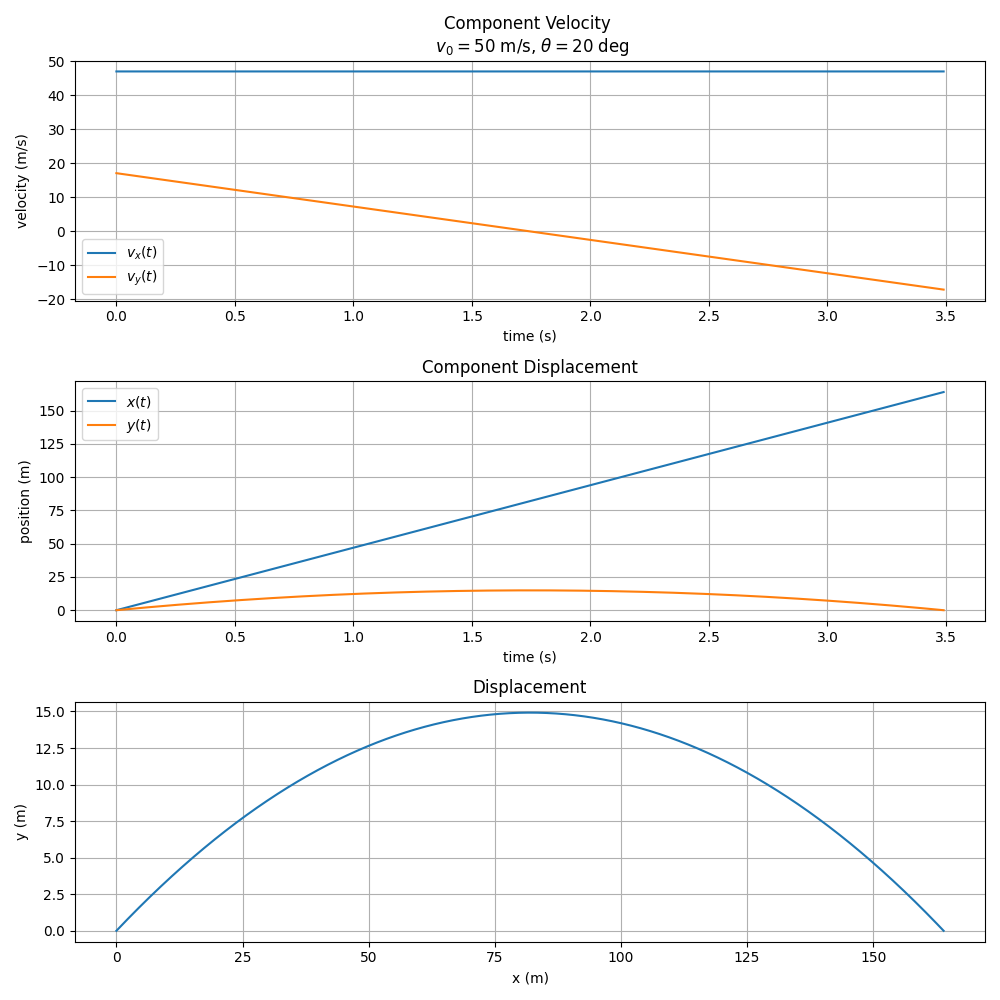

In [2]:
#define important variables
g = 9.8 #m/s2 --> gravity
m = 1 #kg --> mass of projectile
theta = 20 # degrees, function will later convert to radians

#initial positions
x0 = 0 #m
y0 = 0 #m
v0 = 50 #initial velocity, m/s

paramsNoDrag = [g, m, theta, x0, y0, v0]
tFinal = 2*(v0*np.sin(theta*np.pi/180))/g
t = np.linspace(0, tFinal, 10000)

def dragless(t, p):
    # p is the parameters for equation 1 above, t is an array for time
    # this will also calculate the velocities as functions of time
    phi = np.pi*p[2]/180
    x = p[3] + np.cos(phi) * v0 * t
    y = p[4] + np.sin(phi) * v0 * t - 0.5 * p[0]*t**2
    vx = v0 * np.cos(phi) * np.ones(len(t))
    vy = v0 * np.sin(phi) - p[0] * t
    return [x, y, vx, vy]

xoft, yoft, vxoft, vyoft = dragless(t, paramsNoDrag)

#make a graph of position and velocity
fig, ax = plt.subplots(3, 1, figsize=(10,10))

ax[0].plot(t, vxoft, label='$v_x(t)$')
ax[0].plot(t, vyoft, label='$v_y(t)$')
ax[0].set_title('Component Velocity \n $v_0 = {}$ m/s, $\\theta = {}$ deg'.format(v0, theta))
ax[0].set_ylabel('velocity (m/s)')
ax[0].set_xlabel('time (s)')
ax[0].legend()


ax[1].plot(t, xoft, label='$x(t)$')
ax[1].plot(t, yoft, label='$y(t)$')
ax[1].set_title('Component Displacement')
ax[1].set_ylabel('position (m)')
ax[1].set_xlabel('time (s)')
ax[1].legend()

ax[2].plot(xoft, yoft)
ax[2].set_title('Displacement')
ax[2].set_xlabel('x (m)')
ax[2].set_ylabel('y (m)')

for a in ax:
    a.grid()

fig.tight_layout()
plt.show()

## Projectiles with linear drag

In  this section, I will consider projectiles with linear drag. For a thorough theoretical analysis, consider Chapter 2 of Taylor's Classical Mechanics, or [this](https://en.wikipedia.org/wiki/Drag_(physics)) wikipedia page for a brief discussion. 

Taking the sum of the forces to be $\sum F = m \dot{\mathbf{v}}$, we now have 

\begin{align*}
m \dot{\mathbf{v}} = 
\begin{pmatrix}
-\beta v_x \\
mg -\beta v_y 
\end{pmatrix}
\end{align*}

where $\beta$ is our drag coefficient. These are two independent first order linear differential equations in $x$ and $y$ whose solutions can be found by integrating: 

\begin{align*}\tag{2}
\frac{\text{d}v_x}{\text{d}t} = -\frac{\beta}{m} v_x \implies
v_x(t) = v_{0x} e^{-\frac{t}{\tau}}
\end{align*}

with $\tau = m/\beta$. For the velocity in the $y$ direction, we can write the equation for $v_y$ as

\begin{align*}
\dot{v_y}(t) =  g - \frac{\beta}{m}v_y = -\frac{\beta}{m}(v_y-v_{\text{ter}})
\end{align*}

where we introduce the terminal velocity $v_{\text{ter}} = mg/\beta$. Integrating this equation, one can find

\begin{align*}\tag{3}
v_y(t) = v_{y0}e^{-t/\tau} + v_{\text{ter}}(1-e^{-t/\tau})
\end{align*}

Given the velocities in (2) and (3), we can find the positions $x(t)$ and $y(t)$ by integrating:

\begin{align*}
x(t) &= v_{x0}\tau (1-e^{-t/\tau}) \\
y(t) &= (v_{y0}+v_{\text{ter}})\tau(1-e^{-t/\tau})-v_{\text{ter}}t
\end{align*}

From the above we can find the trajectory to be

\begin{align*}\tag{4}
y(x) = \frac{v_{y0}+v_{\text{ter}}}{v_{x0}}x + v_{\text{ter}}
\tau \ln (1- \frac{x}{v_{x0}\tau})
\end{align*}

An important thing to consider is that this linear drag applies usually for small projectiles in relatively viscous media. By relatively viscous, we mean a medium where the inertial forces of the fluid are comparable to those due to the momentum of the projectile. As such, I will be using a small mass moving in a medium of $\beta = 1.6 \times 10^{-4}$ N s /m^2.

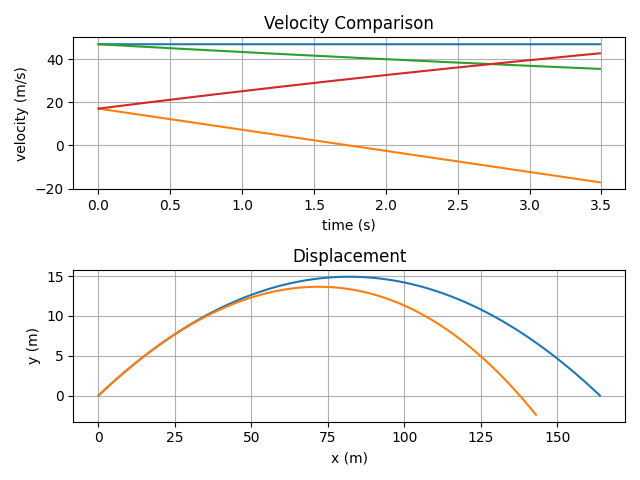

In [3]:
"""
In this cell, I will plot the trajectories of the dragless and 
linear drag projectiles side by side in order to compare their 
behavior
"""
#define important variables
g = 9.8 #m/s2 --> gravity
m = .002 #kg --> mass of projectile
theta = 20 # degrees, function will later convert to radians

#initial positions
x0 = 0 #m
y0 = 0 #m
v0 = 50 #initial velocity, m/s

#drag coefficient and time constant
beta = 1.6e-4 # N s/m2
tau = m/beta

#number of time steps
N = 10000

#time -> for now will use the same as the range for dragless
tFinal = 2*(v0*np.sin(theta*np.pi/180))/g
t = np.linspace(0, tFinal, N)

#paramters to plug into our function for determining the trajectory
paramsLinDrag = [g, m, tau, theta, x0, y0, v0]

def linDrag(t, p):
    g, m, tau, theta, x0, y0, v0 = p
    phi = theta*np.pi/180
    vy0 = np.sin(phi)*v0
    vx0 = np.cos(phi)*v0
    vter = tau*g

    vx = vx0*np.exp(-t/tau)
    vy = vy0*np.exp(-t/tau) + vter*(1-np.exp(-t/tau))

    x = vx0*tau*(1-np.exp(-t/tau))
    y = (vy0 + vter)*tau*(1-np.exp(-t/tau)) - vter*t

    yx = x * (vy0 + vter)/vx0 + vter * tau * np.log(1 - x/(vx0*tau))

    return [x, y, vx, vy, yx]

x1oft, y1oft, vx1oft, vy1oft = dragless(t, paramsNoDrag)
x2oft, y2oft, vx2oft, vy2oft, y2ofx = linDrag(t, paramsLinDrag)

#graph, similar to above; will only do velocity and displacement

fig, ax = plt.subplots(2, 1)

ax[0].plot(t, vx1oft)
ax[0].plot(t, vy1oft)
ax[0].plot(t, vx2oft)
ax[0].plot(t, vy2oft)
ax[0].set_title('Velocity Comparison')
ax[0].set_xlabel('time (s)')
ax[0].set_ylabel('velocity (m/s)')

ax[1].plot(x1oft, y1oft)
ax[1].plot(x2oft, y2oft)
ax[1].set_title('Displacement')
ax[1].set_xlabel('x (m)')
ax[1].set_ylabel('y (m)')

for a in ax:
    a.grid()


fig.tight_layout()
plt.show()

## Projectile motion with quadratic drag

Now I will consider the motion of a projectile undergoing quadratic drag. For such a situation, we can express Newton's laws of motion as: 

\begin{align*}
\mathbf{F} = m\ddot{\mathbf{x}} = m \dot{\mathbf{v}} = 
\begin{pmatrix}
-\alpha v v_x \\
-mg -\alpha v v_y
\end{pmatrix}
\end{align*}

where $v = v(v_x, v_y) = \sqrt{v_x^2+v_y^2}$, $\alpha$ is the quadratic drag coefficient, $g$ is the gravitational constant, and $m$ is the mass of the system. This is a first order coupled differential equation, with $\dot{v}_x = f(v_x, v_y, t)$ and $\dot{v}_y = g(v_x, v_y, t)$.

To solve this, we can define the state function $\mathbf{f}$


\begin{align*}
\mathbf{f}(v_x, v_y, t) = 
\begin{pmatrix}
f(v_x, v_y, t) \\
g(v_x, v_y, t)
\end{pmatrix}
=
\begin{pmatrix}
-\frac{\alpha}{m} \sqrt{v_x^2+v_y^2} v_x \\
-g -\frac{\alpha}{m} \sqrt{v_x^2+v_y^2} v_y
\end{pmatrix}
\end{align*}

This function can then be fed into the scipy.integrate.ivp_solve function in order to solve for the velocity.

Finally, to get the position $\mathbf{x}(t)$, we can integrate our velocity:

\begin{align*}
\mathbf{x}(t) = \int_{t_0}^t \mathbf{v}(t') dt' \simeq 
\sum_{i = 1}^N \mathbf{v}_i \Delta t_i
\end{align*}

In the last step, we express the computed velocities as $\mathbf{v}_i = \begin{pmatrix} v_{xi} \\ v_yi \end{pmatrix}$ determined at each time-step $\Delta t_i$ from our Runge Kutta method. This integral can be computed using a cumulative trapezoidal or cumulative Simpsom algorithm from scipy.integrate.

In [ ]:
"""
The code used here I developed in a different notebook:
"2d_projectile_motion_quadratic_drag.ipynb"
"""

def stateFunction(t, vstar, beta, g, m):
    vx, vy = vstar # unpack the state vector components
    vxDot = -(beta/m)*np.sqrt(vx**2 + vy**2)*vx #calculate derivative in x
    vyDot = -g - (beta/m)*np.sqrt(vx**2 + vy**2)*vy # calculate derivative in y 
    return [vxDot, vyDot] #return answer as list

def integrateVelocity(t, vel, r0):
    x0, y0 = r0 #unpack initial position
    vx, vy = vel #unpack velocity array

    #integrate the velocity wrt time to determine position
    xOfT = sc.integrate.cumulative_simpson(vx, x=t, initial=x0)
    yOfT = sc.integrate.cumulative_simpson(vy, x=t, initial=y0)

    return [xOfT, yOfT] #return answer as list

def solve(t, fun, q0, args):
    #args contains the coefficients for the state function 
    
    #qstar needs to be the function that determines the derivative (stateFunction above)
    t_span = (t[0], t[-1]) #define the range of time based on t array
    #numerically solve given initial conditions 
    sol = sc.integrate.solve_ivp(fun, t_span, q0,
                                 method='RK45', t_eval=t,
                                 args=args)
    
    solution = [t] #create a list for the solution
    #unpack the solution vector to return as a tuple
    for y in sol.y:
        solution.append(y)
    
    return solution


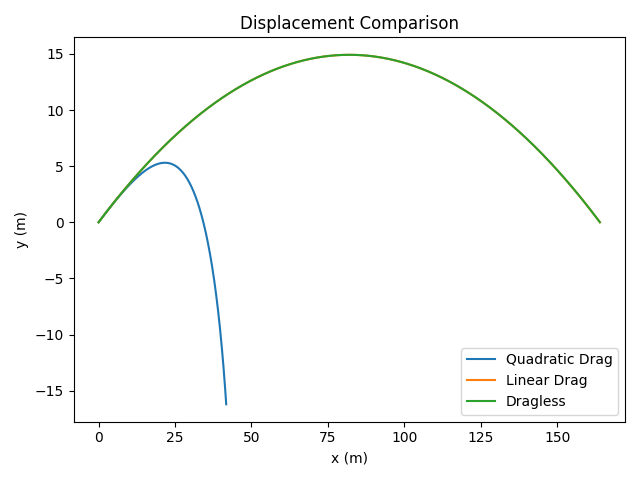

In [22]:
"""
In this cell, I will plot the trajectories of the dragless and 
quadratic drag projectiles side by side in order to compare their 
behavior
"""

#define important variables
g = 9.8 #m/s2 --> gravity
m = .002 #kg --> mass of projectile
theta = 20 # degrees, function will later convert to radians

#initial positions
x0 = 0 #m
y0 = 0 #m
v0 = 50 #initial velocity, m/s

N = 10000 # number of time steps
#start and end times
tStart = 0
tEnd = 2*(v0*np.sin(theta*np.pi/180))/g
t = np.linspace(0, tEnd, N)

#drag coefficient
alpha = 0.25 #Ns2/m4 order of magnitude given by taylor book
beta = 1.6e-4 # N s/m2
m = 5 #kg, note quadratic drag applies to bigger objects

args = [alpha, g, m] #coefficients for state function
v0arr = [v0*np.cos(np.pi*theta/180), v0*np.sin(np.pi*theta/180)] #m/s, initial component velocity, vx,vy
r0 = [x0, y0] # m, initial position x, y

tau = m/beta

_, vx, vy = solve(t, stateFunction, v0arr, args) # no need for the time

#velocity vectors 
v = [vx, vy]

#integrate velocity to get positions
xoft, yoft = integrateVelocity(t, v, r0)

paramsNoDrag = [g, m, theta, x0, y0, v0]
paramsLinDrag = [g, m, tau, theta, x0, y0, v0]

#calculate dragless - do again to mantain cells independent
x1oft, y1oft, vx1oft, vy1oft = dragless(t, paramsNoDrag)
x2oft, y2oft, vx2oft, vy2oft, y2ofx = linDrag(t, paramsLinDrag)

#graph

fig, ax = plt.subplots()

ax.plot(xoft, yoft, label='Quadratic Drag')
ax.plot(x2oft, y2ofx, label='Linear Drag')
ax.plot(x1oft, y1oft, label='Dragless')
ax.set_title('Displacement Comparison')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')

ax.legend()
fig.tight_layout()

plt.show()


### an aside: linear and quadratic drag in 1 d

Consider a projectile moving in the x direction that is subject to both a linear and quadratic drag. Newton's law would state that:

\begin{align*}
m \frac{\text{d}v}{\text{d}t} = -\alpha v - \beta v^2
\end{align*}

Separating variables, we find

\begin{align*}
\frac{\text{d}v}{-v(\alpha + \beta v)} = \frac{\text{d}t}{m}
\end{align*}

Integrating, we have 

\begin{align*}
\int_{v_0}^{v(t)}\frac{\text{d}v}{-v(\alpha + \beta v)} = \int_0^t \frac{\text{d}t}{m}
\end{align*}

The integral on the left hand side we can attempt by decomposing into fractions:

\begin{align*}
\int\frac{\text{d}v}{-v(\alpha + \beta v)} = \int \frac{A}{-v} + \frac{B}{\alpha + \beta v} \text{d}v
\end{align*}

Considering the integrand, we see that 

\begin{align*}
A\alpha + A\beta v - vB = 1 \implies A\beta - B = 0, A\alpha = 1
\end{align*}

Thus, $A = 1/\alpha$, and $B = \beta/\alpha$. 

Therefore, the integral becomes 

\begin{align*}
\int_{v_0}^{v(t)} \frac{1}{-\alpha v} + \frac{\beta}{\alpha^2 + \alpha \beta v} \text{d}v = 
-\frac{1}{\alpha}(\ln \frac{v(t)}{v_0} - \ln \frac{\alpha^2 + \alpha \beta v(t)}{\alpha^2 + \alpha \beta v_0})
\end{align*}

